In [3]:
import numpy as np
import scipy as sp
import utilities as u
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d as spline

%matplotlib inline

# Toy model for Wills et al result from probabilistic perspective

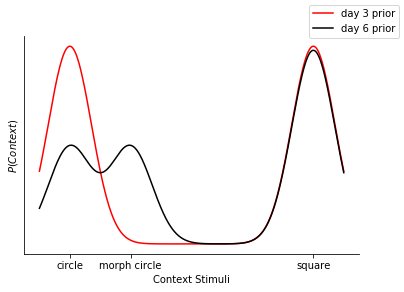

In [4]:
x = np.linspace(0,1,num=1000)
wills_prior_pre = u.gaussian(x,.1,.1) + u.gaussian(x,.1,.9)
wills_prior_pre /= wills_prior_pre.sum()

wills_prior = u.gaussian(x,.1,.1) + u.gaussian(x,.1,.3)+ 2*u.gaussian(x,.1,.9)
wills_prior/=wills_prior.sum()
f,ax = plt.subplots()
ax.plot(x,wills_prior_pre,color='red')
ax.plot(x,wills_prior,color = 'black')

ax.set_yticks([])
ax.set_ylabel("$P(Context)$")
ax.set_xlabel("Context Stimuli")
ax.set_xticks([.1,.3,.9])
ax.set_xticklabels(["circle","morph circle","square"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

f.legend(["day 3 prior","day 6 prior"])

In [5]:
likelihood = u.gaussian(x[:,np.newaxis],.2,x[np.newaxis,:])

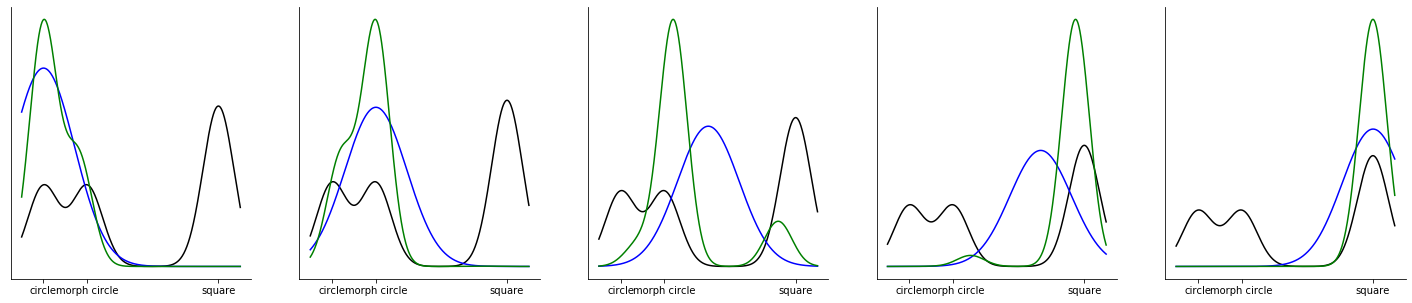

In [6]:
f,ax = plt.subplots(1,5,figsize=[25,5])
for i in range(5):
    l=likelihood[200*i+100,:]
    ax[i].plot(x,wills_prior,color='black')
    ax[i].plot(x,l/l.sum(),color='blue')
    _post = l*wills_prior
    _post = _post/_post.sum()
    ax[i].plot(x,_post,color='green')
    ax[i].set_yticks([])


    ax[i].set_xticks([.1,.3,.9])
    ax[i].set_xticklabels(["circle","morph circle","square"])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)


Text(0, 0.5, '$M$')

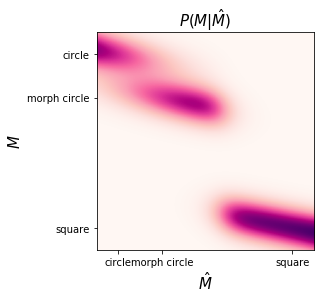

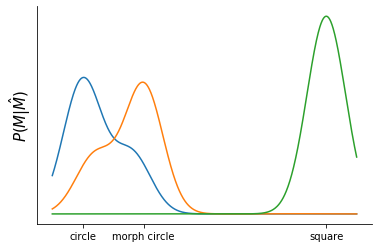

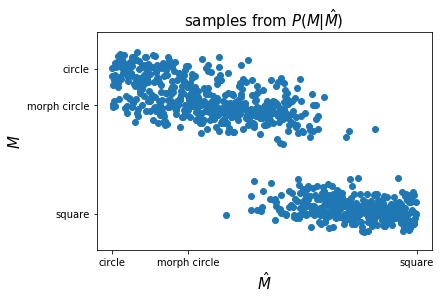

In [7]:
post = wills_prior[np.newaxis,:]*likelihood
post = post/post.sum(axis=1,keepdims=True)
post = post.T
f,ax = plt.subplots()
ax.imshow(post,cmap='RdPu',extent=[0,1000,0,1000])
ax.set_xticks([100,300,900])
ax.set_xticklabels(["circle","morph circle","square"])
ax.set_yticks([100,700,900])
ax.set_yticklabels(["square","morph circle","circle"])
ax.set_title("$P(M|\hat{M})$",fontsize=15)
ax.set_xlabel("$\hat{M}$",fontsize=15)
ax.set_ylabel("$M$",fontsize=15)

f,ax = plt.subplots()
ax.plot(x,post[:,100])
ax.plot(x,post[:,300])
ax.plot(x,post[:,900])
ax.set_yticks([])
ax.set_xticks([.1,.3,.9])
ax.set_xticklabels(["circle","morph circle","square"])
ax.set_ylabel("$P(M|\hat{M})$",fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


intpost = post[:,100:900]
samples = []
for i in range(intpost.shape[1]):
    tmppost  = intpost[:,i]
#     print(tmppost.sum())
    cumtmppost = np.cumsum(tmppost)
    cumtmppost[0],cumtmppost[-1]=0,1
    spl = spline(cumtmppost,x)
    
    samples.append(spl(np.random.rand()))
    
f,ax = plt.subplots()
ax.scatter(np.arange(100,900),samples)

ax.set_yticks([.1,.3,.9])
ax.set_yticklabels(["circle","morph circle","square"])
ax.set_ylim([1.1,-.1])
ax.set_xticks([100,300,900])
ax.set_xticklabels(["circle","morph circle","square"])
ax.set_title("samples from $P(M|\hat{M})$",fontsize=15)
ax.set_xlabel("$\hat{M}$",fontsize=15)
ax.set_ylabel("$M$",fontsize=15)
# samples_sm = sp.ndimage.filters.median_filter(samples,11)
# ax.scatter(np.arange(100,900),samples_sm)






# circsim = np.matmul(post[:,300:301].T,post).ravel()
# squaresim = np.matmul(post[:,900:901].T,post).ravel()
# print(circsim.shape)
# f,ax = plt.subplots()
# ax.plot(circsim[300:900])
# ax.plot(squaresim[300:900])

# f,ax = plt.subplots()
# ax.plot(x[np.argmax(post,axis=0)])

# Colgin "single location" training

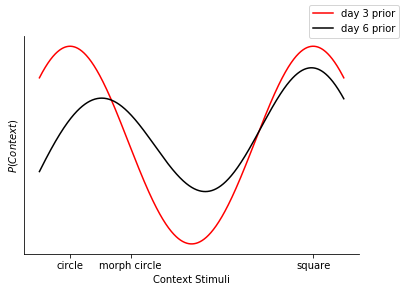

In [8]:
colgin_prior_pre = u.gaussian(x,.3,.1) + u.gaussian(x,.3,.9)
colgin_prior_pre /= colgin_prior_pre.sum()

colgin_prior = u.gaussian(x,.3,.1) + 2*u.gaussian(x,.3,.9) + u.gaussian(x,.3,.3)
colgin_prior/=colgin_prior.sum()
f,ax = plt.subplots()
ax.plot(x,colgin_prior_pre,color='red')
ax.plot(x,colgin_prior,color = 'black')

ax.set_yticks([])
ax.set_ylabel("$P(Context)$")
ax.set_xlabel("Context Stimuli")
ax.set_xticks([.1,.3,.9])
ax.set_xticklabels(["circle","morph circle","square"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

f.legend(["day 3 prior","day 6 prior"])


[Text(0, 0, 'circle'), Text(0, 0, 'morph circle'), Text(0, 0, 'square')]

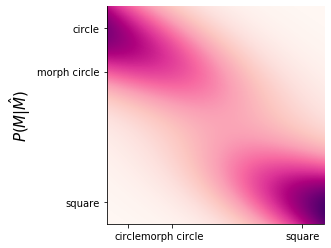

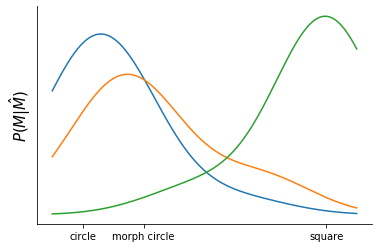

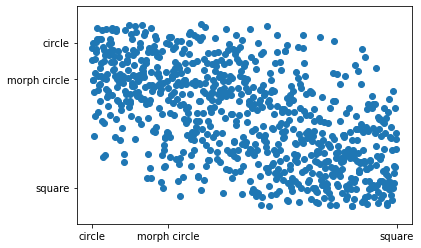

In [9]:
likelihood = u.gaussian(x[:,np.newaxis],.4,x[np.newaxis,:])
post = colgin_prior*likelihood
post = post/post.sum(axis=1,keepdims=True)
post = post.T

f,ax = plt.subplots()
ax.imshow(post,cmap='RdPu',extent=[0,1000,0,1000])
ax.set_xticks([100,300,900])
ax.set_xticklabels(["circle","morph circle","square"])
ax.set_yticks([100,700,900])
ax.set_yticklabels(["square","morph circle","circle"])
ax.set_ylabel("$P(M|\hat{M})$",fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

f,ax = plt.subplots()
ax.plot(x,post[:,100])
ax.plot(x,post[:,300])
ax.plot(x,post[:,900])
ax.set_yticks([])
ax.set_xticks([.1,.3,.9])
ax.set_xticklabels(["circle","morph circle","square"])
ax.set_ylabel("$P(M|\hat{M})$",fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


intpost = post[:,100:900]
samples = []
for i in range(intpost.shape[1]):
    tmppost  = intpost[:,i]
#     print(tmppost.sum())
    cumtmppost = np.cumsum(tmppost)
    cumtmppost[0],cumtmppost[-1]=0,1
    spl = spline(cumtmppost,x)
    
    samples.append(spl(np.random.rand()))
    
f,ax = plt.subplots()
ax.scatter(np.arange(100,900),samples)

ax.set_yticks([.1,.3,.9])
ax.set_yticklabels(["circle","morph circle","square"])
ax.set_ylim([1.1,-.1])
ax.set_xticks([100,300,900])
ax.set_xticklabels(["circle","morph circle","square"])

# Leutgeb results

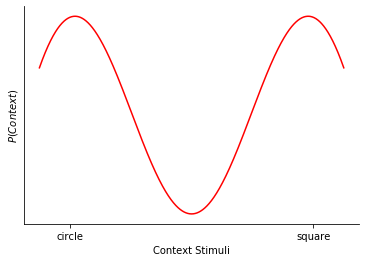

In [10]:
leutgeb_prior = u.gaussian(x,.4,.1) + u.gaussian(x,.4,.9)
leutgeb_prior /= leutgeb_prior.sum()
f,ax = plt.subplots()
ax.plot(x,leutgeb_prior,color='red')


ax.set_yticks([])
ax.set_ylabel("$P(Context)$")
ax.set_xlabel("Context Stimuli")
ax.set_xticks([.1,.9])
ax.set_xticklabels(["circle","square"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



[Text(0, 0, 'circle'), Text(0, 0, 'square')]

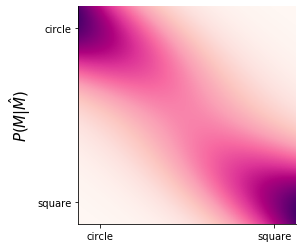

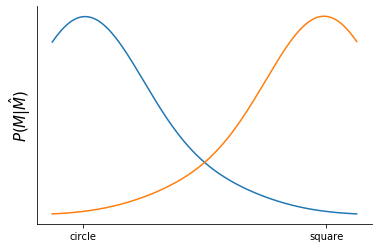

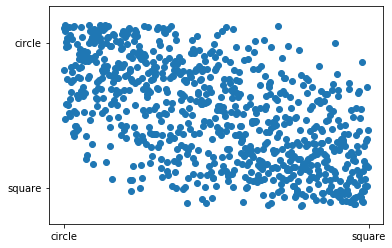

In [11]:
likelihood = u.gaussian(x[:,np.newaxis],.4,x[np.newaxis,:])
post = leutgeb_prior*likelihood
post = post/post.sum(axis=1,keepdims=True)
post = post.T

f,ax = plt.subplots()
ax.imshow(post,cmap='RdPu',extent=[0,1000,0,1000])
ax.set_xticks([100,900])
ax.set_xticklabels(["circle","square"])
ax.set_yticks([100,900])
ax.set_yticklabels(["square","circle"])
ax.set_ylabel("$P(M|\hat{M})$",fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

f,ax = plt.subplots()
ax.plot(x,post[:,100])
ax.plot(x,post[:,900])
ax.set_yticks([])
ax.set_xticks([.1,.9])
ax.set_xticklabels(["circle","square"])
ax.set_ylabel("$P(M|\hat{M})$",fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


intpost = post[:,100:900]
samples = []
for i in range(intpost.shape[1]):
    tmppost  = intpost[:,i]
#     print(tmppost.sum())
    cumtmppost = np.cumsum(tmppost)
    cumtmppost[0],cumtmppost[-1]=0,1
    spl = spline(cumtmppost,x)
    
    samples.append(spl(np.random.rand()))
    
f,ax = plt.subplots()
ax.scatter(np.arange(100,900),samples)

ax.set_yticks([.1,.9])
ax.set_yticklabels(["circle","square"])
ax.set_ylim([1.1,-.1])
ax.set_xticks([100,900])
ax.set_xticklabels(["circle","square"])




# Colgin "double location" training

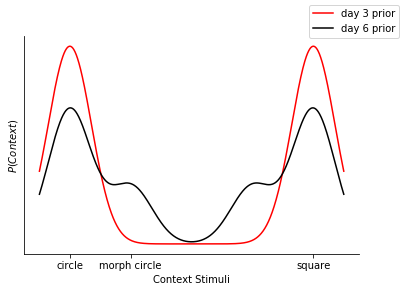

In [12]:
colgin_prior_pre = u.gaussian(x,.1,.1) + u.gaussian(x,.1,.9)
colgin_prior_pre /= colgin_prior_pre.sum()

colgin_prior = 7*u.gaussian(x,.1,.1) + 3*u.gaussian(x,.1,.3)+ 7*u.gaussian(x,.1,.9) +3*u.gaussian(x,.1,.7)
colgin_prior/=colgin_prior.sum()
f,ax = plt.subplots()
ax.plot(x,colgin_prior_pre,color='red')
ax.plot(x,colgin_prior,color = 'black')

ax.set_yticks([])
ax.set_ylabel("$P(Context)$")
ax.set_xlabel("Context Stimuli")
ax.set_xticks([.1,.3,.9])
ax.set_xticklabels(["circle","morph circle","square"])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

f.legend(["day 3 prior","day 6 prior"])

[Text(0, 0, 'circle'), Text(0, 0, 'morph circle'), Text(0, 0, 'square')]

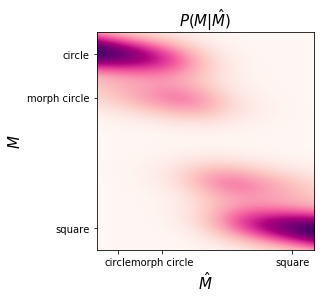

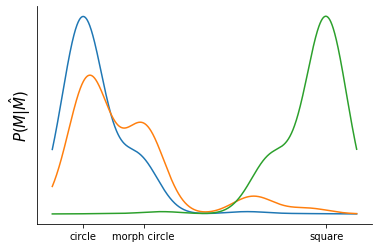

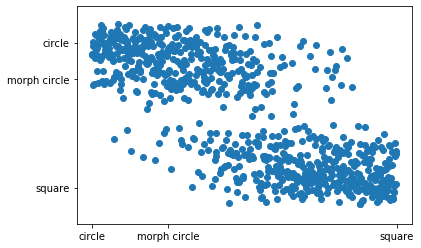

In [13]:
likelihood = u.gaussian(x[:,np.newaxis],.3,x[np.newaxis,:])
post = colgin_prior[np.newaxis,:]*likelihood
post = post/post.sum(axis=1,keepdims=True)
post = post.T
f,ax = plt.subplots()
ax.imshow(post,cmap='RdPu',extent=[0,1000,0,1000])
ax.set_xticks([100,300,900])
ax.set_xticklabels(["circle","morph circle","square"])
ax.set_yticks([100,700,900])
ax.set_yticklabels(["square","morph circle","circle"])
ax.set_title("$P(M|\hat{M})$",fontsize=15)
ax.set_xlabel("$\hat{M}$",fontsize=15)
ax.set_ylabel("$M$",fontsize=15)

f,ax = plt.subplots()
ax.plot(x,post[:,100])
ax.plot(x,post[:,300])
ax.plot(x,post[:,900])
ax.set_yticks([])
ax.set_xticks([.1,.3,.9])
ax.set_xticklabels(["circle","morph circle","square"])
ax.set_ylabel("$P(M|\hat{M})$",fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


intpost = post[:,100:900]
samples = []
for i in range(intpost.shape[1]):
    tmppost  = intpost[:,i]
#     print(tmppost.sum())
    cumtmppost = np.cumsum(tmppost)
    cumtmppost[0],cumtmppost[-1]=0,1
    spl = spline(cumtmppost,x)
    
    samples.append(spl(np.random.rand()))
    
f,ax = plt.subplots()
ax.scatter(np.arange(100,900),samples)

ax.set_yticks([.1,.3,.9])
ax.set_yticklabels(["circle","morph circle","square"])
ax.set_ylim([1.1,-.1])
ax.set_xticks([100,300,900])
ax.set_xticklabels(["circle","morph circle","square"])
# samples_sm = sp.ndimage.filters.median_filter(samples,11)
# ax.scatter(np.arange(100,900),samples_sm)






# circsim = np.matmul(post[:,300:301].T,post).ravel()
# squaresim = np.matmul(post[:,900:901].T,post).ravel()
# print(circsim.shape)
# f,ax = plt.subplots()
# ax.plot(circsim[300:900])
# ax.plot(squaresim[300:900])

# f,ax = plt.subplots()
# ax.plot(x[np.argmax(post,axis=0)])